# Abalone Case Study

Introductions:


        The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem,In this particular case we have to find number of rings which indirectly related to age.


# Importing the dataset

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Preparing the Dataset

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [7]:
df['Sex'].replace(['I','F','M'],[0,1,2],inplace=True)

In [8]:
df['Sex'].value_counts()

2    1528
0    1342
1    1307
Name: Sex, dtype: int64

In [9]:
#Lets check for any unwanted columns

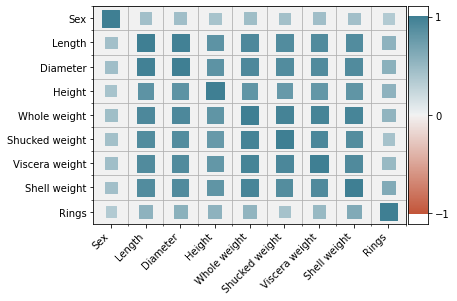

In [10]:
plt.plot(figsize=(10,7))
corrplot(df.corr(),size_scale=300)
plt.show()

Observations:
    
    1.Every column is highly correlated to each other.

In [11]:
df.shape

(4177, 9)

In [12]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Obsevations:
    
    1.There are two int values.

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


# EDA

# Univariate Analysis

In [15]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

1.Sex

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')]

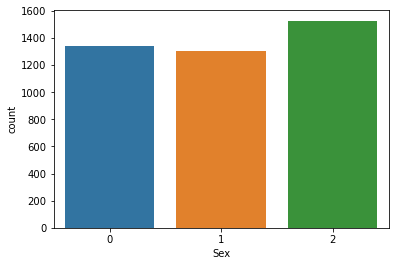

In [16]:
plt.figure()
count1=sns.countplot(df['Sex'])
count1.set_xticklabels(count1.get_xticklabels())

Observations:
    
    1.Not much class imbalance is there.

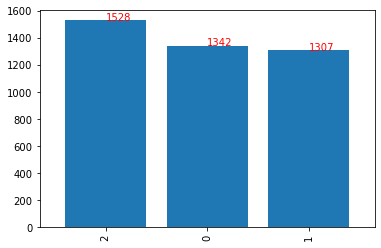

In [17]:
s = df['Sex'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Sex + 0.2 , v.Sex, color='red')

Observations:
    
    1.There are 1528 reports of male,1342 reports of infant and 1307 reports of females are available.

2.Length

In [18]:
df['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

Observations:
    
    1.Mean of length is 0.52.

<AxesSubplot:>

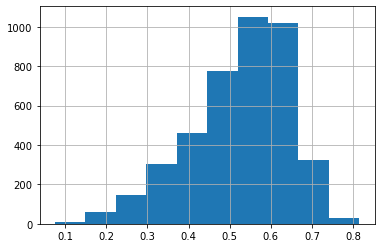

In [19]:
df['Length'].hist(grid=True)

Observations:
    
    1.We can clearly see that most of the values lies between 0.5 to 0.65.

<AxesSubplot:xlabel='Length', ylabel='Density'>

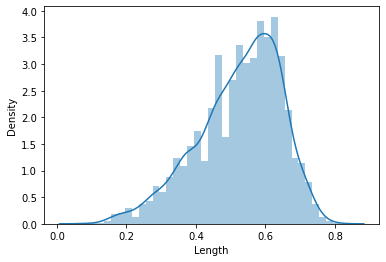

In [20]:
sns.distplot(df['Length'])

Observations:
    
    1.There is skewness.

<AxesSubplot:xlabel='Length'>

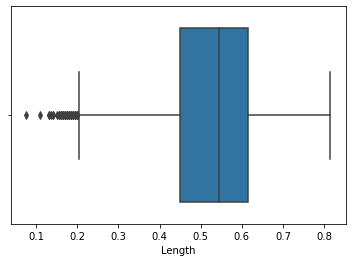

In [21]:
sns.boxplot(df['Length'])

Observations:
    
    1.There are outliers.

3.Diameter

In [22]:
df['Diameter'].describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

Observations:
    
    1.All values are so close.

<AxesSubplot:>

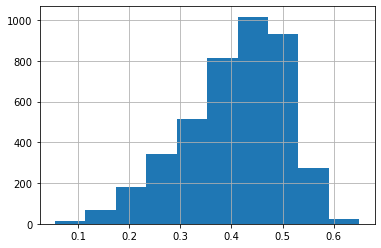

In [23]:
df['Diameter'].hist(grid=True)

Observations:
    
    1.Most of the values lies between 0.42 to 0.55

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

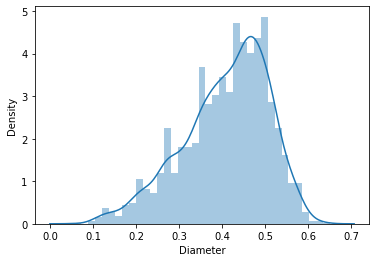

In [24]:
sns.distplot(df['Diameter'])

Observations:
    
    1.There are slight skewness.

<AxesSubplot:xlabel='Diameter'>

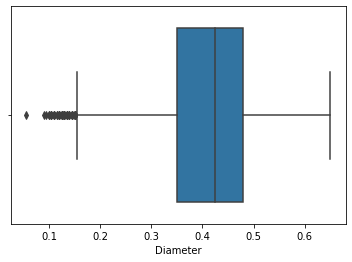

In [25]:
sns.boxplot(df['Diameter'])

Observations:
    
    1.There is skewness which has to be treated.

Sex
count    4177.000000
mean        1.044530
std         0.827815
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Sex, dtype: float64




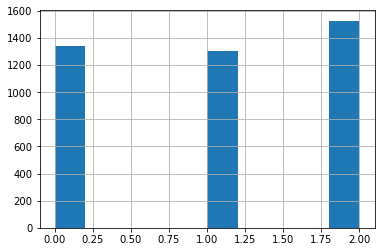

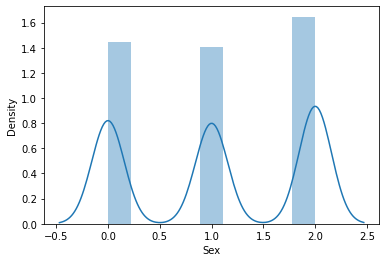

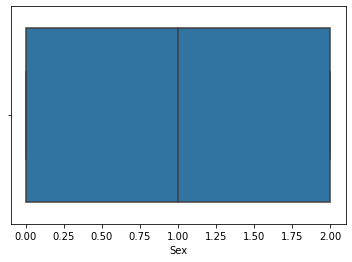



Length
count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64




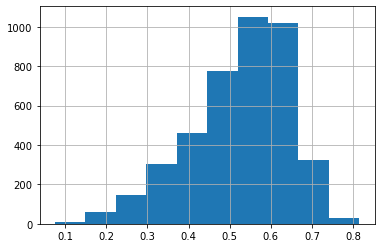

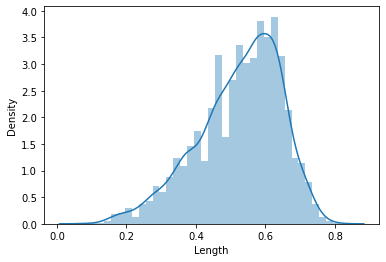

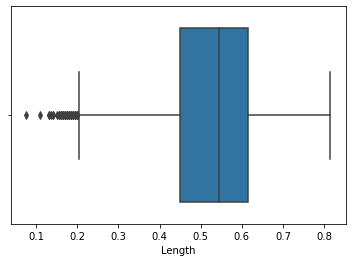



Diameter
count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64




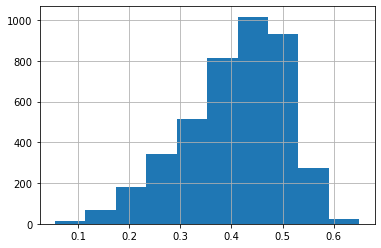

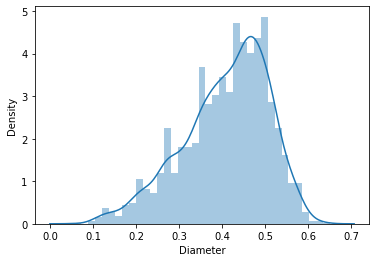

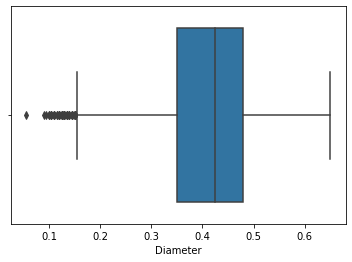



Height
count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64




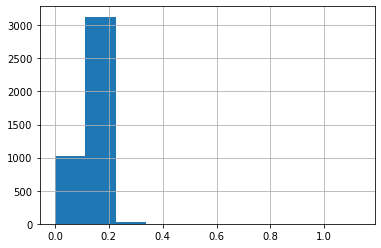

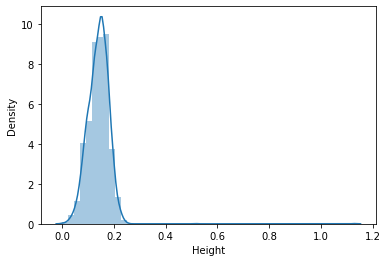

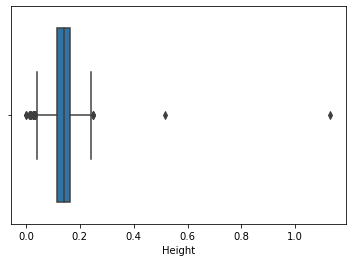



Whole weight
count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Whole weight, dtype: float64




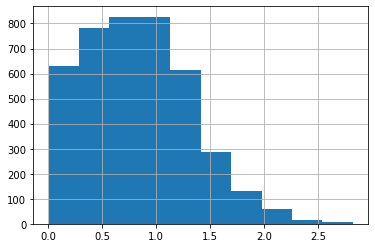

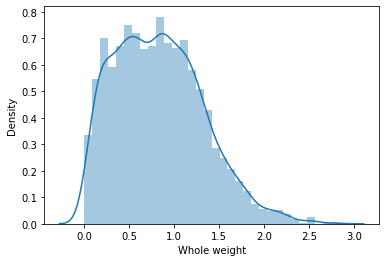

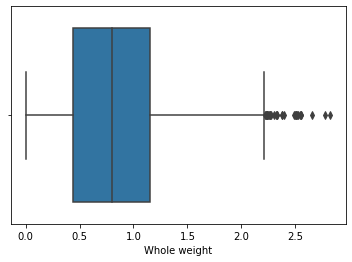



Shucked weight
count    4177.000000
mean        0.359367
std         0.221963
min         0.001000
25%         0.186000
50%         0.336000
75%         0.502000
max         1.488000
Name: Shucked weight, dtype: float64




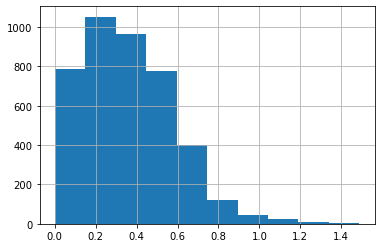

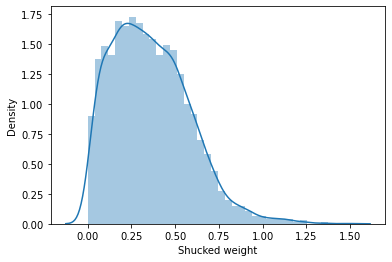

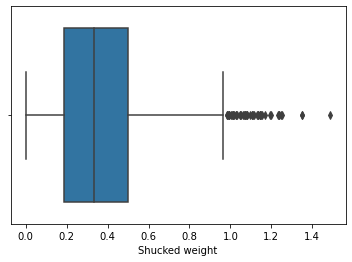



Viscera weight
count    4177.000000
mean        0.180594
std         0.109614
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.760000
Name: Viscera weight, dtype: float64




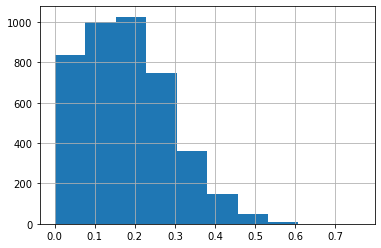

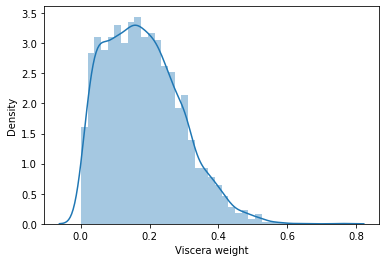

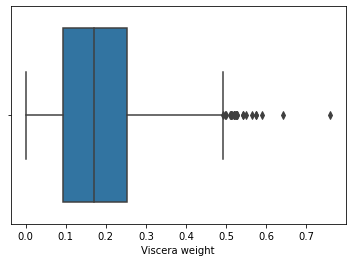



Shell weight
count    4177.000000
mean        0.238831
std         0.139203
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         1.005000
Name: Shell weight, dtype: float64




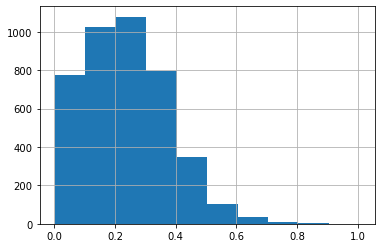

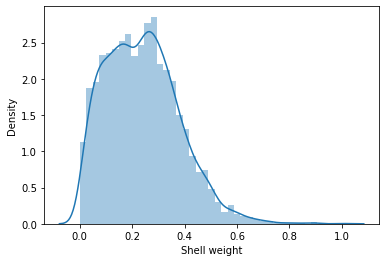

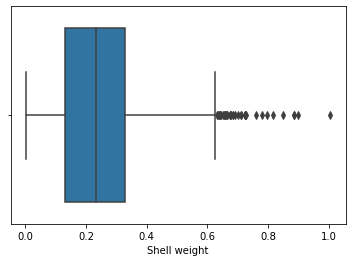



Rings
count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64




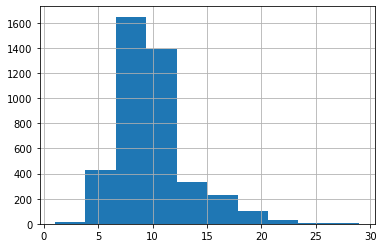

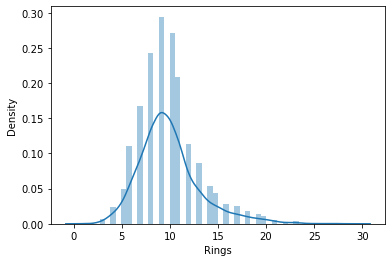

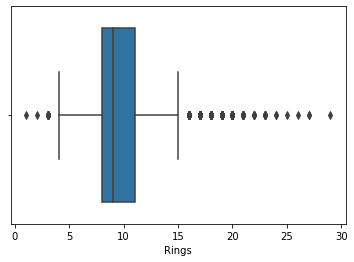

In [26]:
for col in df:
    print(col)
    print(df[col].describe())
    print('\n')
    plt.plot()
    df[col].hist(grid=True)
    plt.show()
    print('\n')
    plt.plot()
    sns.distplot(df[col])
    plt.show()
    print('\n')
    plt.plot()
    sns.boxplot(df[col])
    plt.show()
    print('\n')

Observations:
    
    1.In height column most of the values are between 0.1 to 0.2 and there are outliers.
    2.In weight column most of the values lies between 0.55 to1.1,there is slight skewness in the column,there are outliers.
    3.In shucked weight column most of the value lies between 0.19 to 0.41,there is a slight skewness,there are outliers.
    4.Viscera weight most of the values lies between 0.09 to 2.2,there are outliers.
    5.In shell weight column most of the values lies between 0.1 to 0.3,there is slight skewness and outliers.
    6.In rings column most of the values lies between 7 to 12, 

# Multivariate Analysis

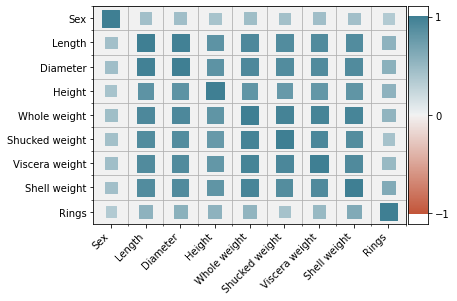

In [27]:
plt.plot(figsize=(15,10))
corrplot(df.corr(),size_scale=300)
plt.show()

Observations:
    
    Lets list out those columns/variables which are highly correlated to number of rings and lets examine them in bi variate analysis.
    1.Rings vs shell weight
    2.Rings vs Lenght
    3.Rings vs Height
    4.Rings vs Whole weight
    5.Rings vs shucked weight
    6.Rings vs viscera weight
    7.Rings vs Shell weight
    
    There are three columns which behaves in the same fashion with all other columns,those are Length, diameter,height
    
     Lets list out those columns/variables which are highly correlated to Sex and lets examine them in bi variate analysis.
     1.Sex vs Length
     2.Sex vs Height
     3.Sex vs Whole weight
     4.Sex vs Shell weight

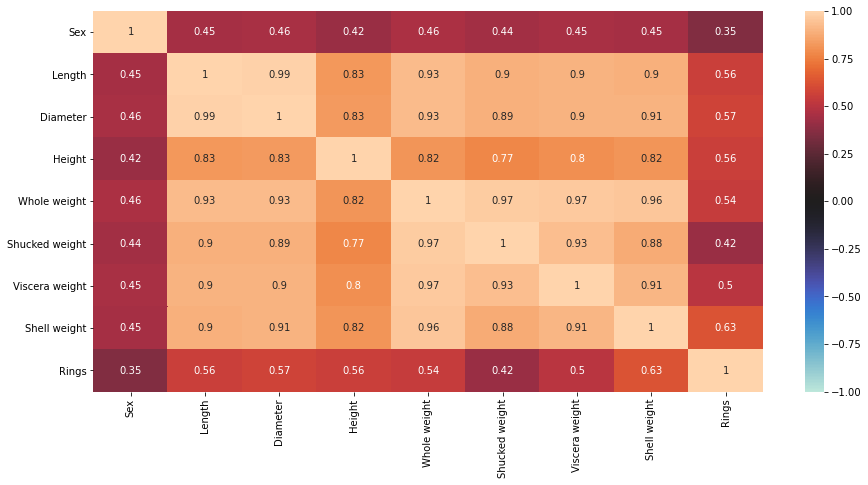

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.There are no variables which are negatively correlated.
    2.need to check the relationship between viscera weight and height.
    3.Diameter and length are realated upto 0.99 correlation value so we can take out one,

In [29]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex               0.351822
Name: Rings, dtype: float64

Observations:
    
    1.We can see that highly correlated column are shell weight, diameter

In [30]:
#lets get the features by using the grouping function

In [31]:
g=df.groupby('Sex')

In [32]:
g0=g.get_group(0)
g1=g.get_group(1)
g2=g.get_group(2)

In [33]:
#Examining the infant

In [34]:
g0.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,1342.0,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,0.0,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
std,0.0,0.108858,0.088109,0.031995,0.286275,0.128405,0.062536,0.084927,2.511554
min,0.0,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.0,0.360000,0.270000,0.085000,0.205500,0.090000,0.042500,0.064125,6.000000
50%,0.0,0.435000,0.335000,0.110000,0.384000,0.169750,0.080500,0.113000,8.000000
75%,0.0,0.510000,0.390000,0.130000,0.599375,0.270375,0.130000,0.178500,9.000000
max,0.0,0.725000,0.550000,0.220000,2.049500,0.773500,0.440500,0.655000,21.000000


In [35]:
g1.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,1307.0,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,1.0,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
std,0.0,0.086160,0.070954,0.039984,0.430316,0.198663,0.097617,0.125649,3.104256
min,1.0,0.275000,0.195000,0.015000,0.080000,0.031000,0.021000,0.025000,5.000000
25%,1.0,0.525000,0.410000,0.140000,0.730000,0.295000,0.159000,0.213250,9.000000
50%,1.0,0.590000,0.465000,0.160000,1.038500,0.440500,0.224000,0.295000,10.000000
75%,1.0,0.640000,0.505000,0.175000,1.320250,0.573250,0.297250,0.375000,12.000000
max,1.0,0.815000,0.650000,1.130000,2.657000,1.488000,0.590000,1.005000,29.000000


In [36]:
g2.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,1528.0,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,2.0,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
std,0.0,0.102697,0.084398,0.034804,0.470581,0.223000,0.104919,0.130834,3.026349
min,2.0,0.155000,0.110000,0.025000,0.015500,0.006500,0.003000,0.005000,3.000000
25%,2.0,0.505000,0.395000,0.130000,0.671625,0.276375,0.145875,0.190000,9.000000
50%,2.0,0.580000,0.455000,0.155000,0.975750,0.421750,0.210000,0.276000,10.000000
75%,2.0,0.630000,0.500000,0.175000,1.265625,0.566000,0.278000,0.355500,12.000000
max,2.0,0.780000,0.630000,0.515000,2.825500,1.351000,0.760000,0.897000,27.000000


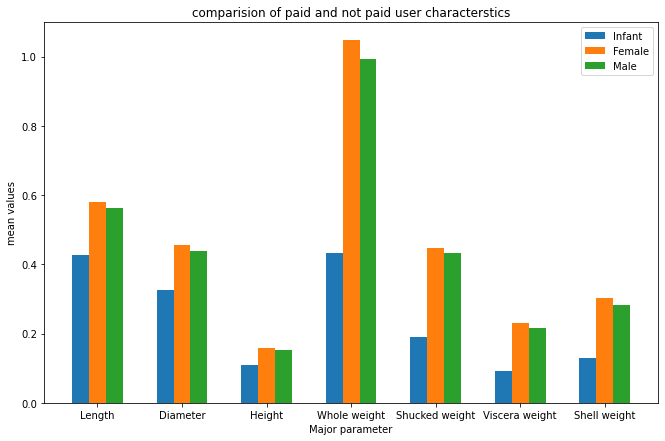

In [37]:
X =['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
yi = [0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182]
yf = [0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010]
ym = [0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yi, 0.2, label = 'Infant')
plt.bar(X_axis + 0, yf, 0.2, label = 'Female')
plt.bar(X_axis + 0.2, ym, 0.2, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision of paid and not paid user characterstics")
plt.legend()
plt.show()

Observations:
    
    1.From the above observations we can conclude that Physically both male and female will be at the same physical parameter.

# Bi variate Analysis

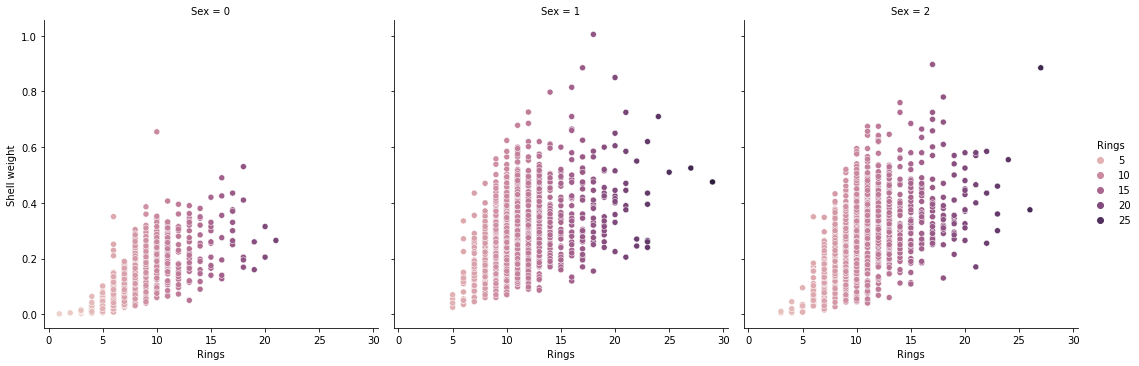

In [38]:

sns.relplot(x='Rings',y='Shell weight',hue='Rings',col='Sex',data=df)
sns.set_palette("Paired")

Observations:
    
    Both male and female shows similar graphs here.

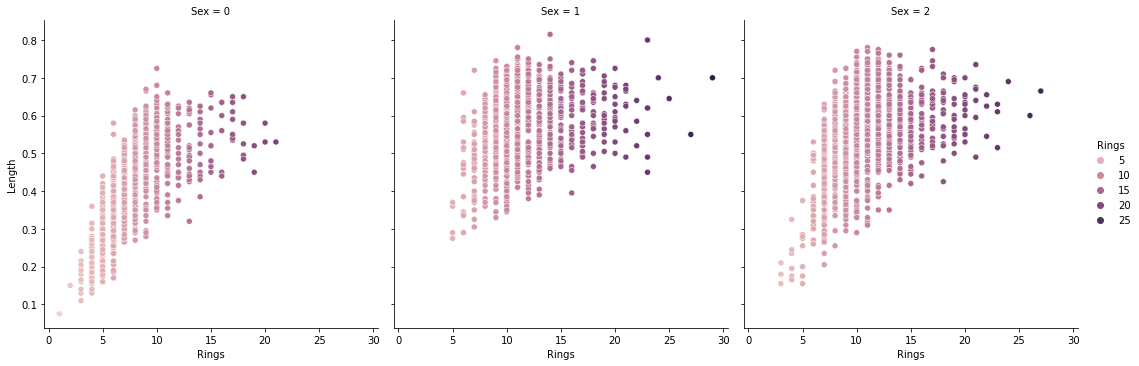

In [39]:
sns.relplot(x='Rings',y='Length',hue='Rings',col='Sex',data=df)

Observations:
    
    1.After the 13th ring they will turn into their sex whether they are male or female.

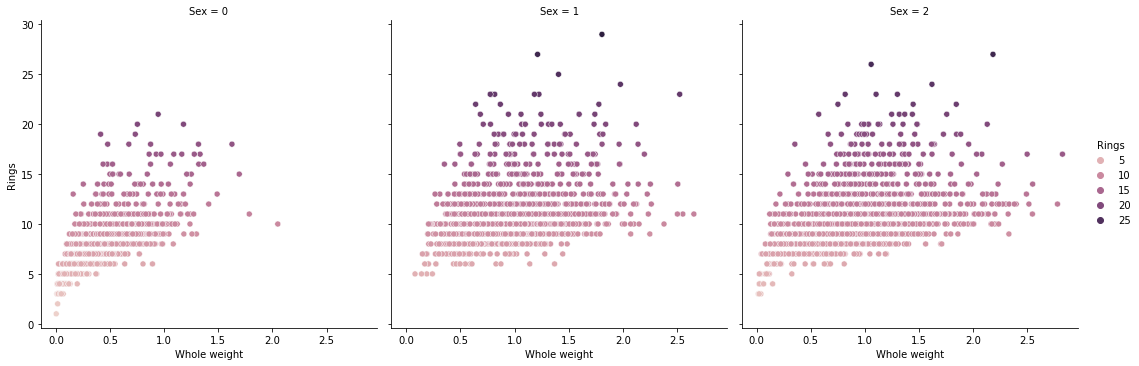

In [40]:
sns.relplot(x='Whole weight',y='Rings',hue='Rings',col='Sex',data=df)

Observations:
    
    1.From the graph we can see that maximum whole weight  can be seen around ring size 10 to 15,it clearly depicts that once the abolone got aged they will loose their whole weight and comes to a range of 10 to 15 .
    
    

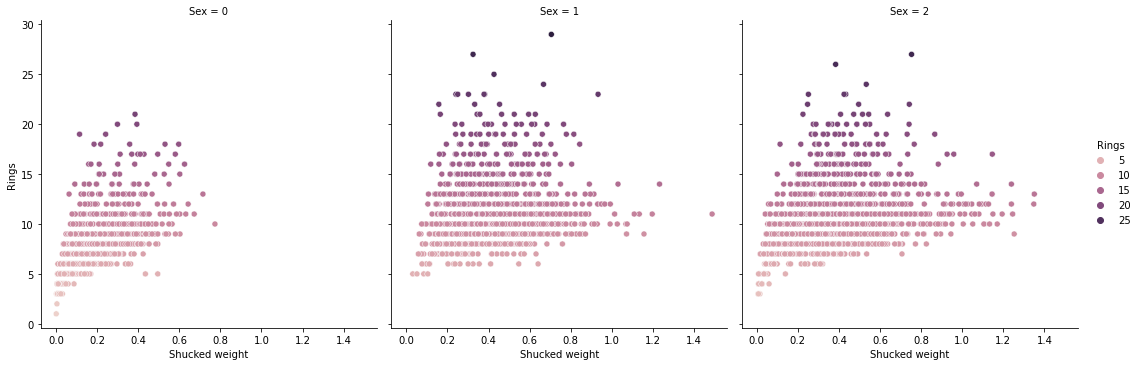

In [41]:
sns.relplot(x='Shucked weight',y='Rings',hue='Rings',col='Sex',data=df)

Observations:
    
    1.We can see the same patterns as whole weight.

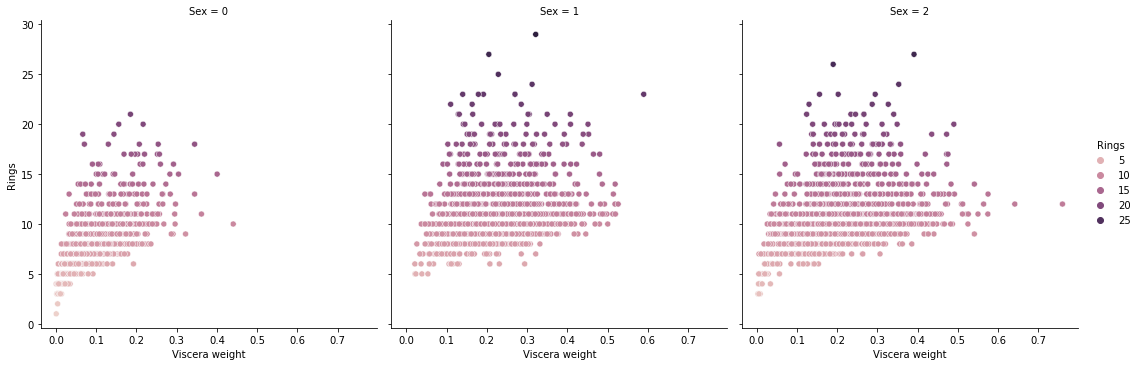

In [42]:
sns.relplot(x='Viscera weight',y='Rings',hue='Rings',col='Sex',data=df)

Observations:
    
    1.All those weights are inter related so that we can see same patterns again and again for all weight related columns.

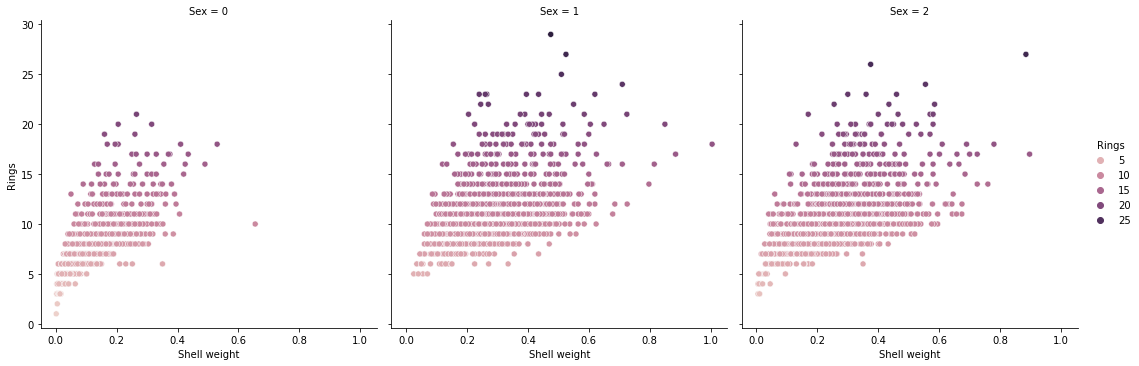

In [43]:
sns.relplot(x='Shell weight',y='Rings',hue='Rings',col='Sex',data=df)

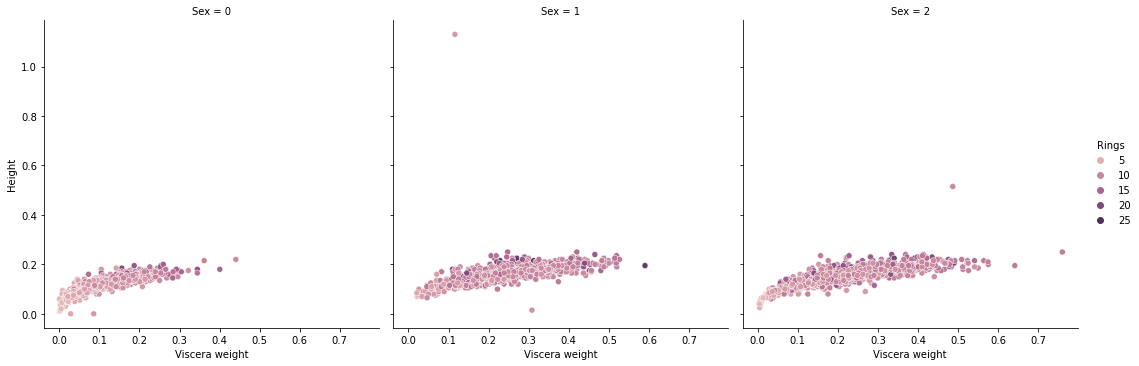

In [44]:
sns.relplot(x='Viscera weight',y='Height',hue='Rings',col='Sex',data=df)

Observations:
    
    1.We can see those Viscera weight values of around 0.5 to 0.6 is for ring size 10 to 15, so we can conclude that once the abalone passes infant stage it will gain weight and as it ages the weight gradually decreases.

# Data Cleaning

In [45]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Observations:
    
    1.There is no null value lets check for the special character.

In [46]:
k=df.applymap(np.isreal)

In [47]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

Sex
True    4177
Name: Sex, dtype: int64


Length
True    4177
Name: Length, dtype: int64


Diameter
True    4177
Name: Diameter, dtype: int64


Height
True    4177
Name: Height, dtype: int64


Whole weight
True    4177
Name: Whole weight, dtype: int64


Shucked weight
True    4177
Name: Shucked weight, dtype: int64


Viscera weight
True    4177
Name: Viscera weight, dtype: int64


Shell weight
True    4177
Name: Shell weight, dtype: int64


Rings
True    4177
Name: Rings, dtype: int64




Observations:
    
    1.We can see all are true values, no false values.

# Removing the Outliers

In [48]:
from scipy.stats import zscore

# Zscore method

In [49]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.035910940866650705


Observations:
    
    1.The data loss is less than 3.5%

# Splitting Target variable

In [50]:
df1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [51]:
x=df1.drop(['Rings'],axis=1)

In [52]:
y=df1['Rings']

In [53]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [54]:
x.shape

(4027, 8)

In [55]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [56]:
y.shape

(4027,)

# Removal of Skewness

In [57]:
x.skew()

Sex              -0.062158
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

Observations:
    
    1.Length and diameter skewness has to be removed.

In [58]:
#lets find the best method for skewness
from scipy import stats
from scipy.stats import skew
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [59]:
skee(x['Length'])

original skewness is: -0.623076307536484


-0.9392014838958269


-1.3227241597956065


-0.14171419524999856




In [60]:
from scipy.stats import boxcox

In [61]:
x['Length']=stats.boxcox(x['Length'])[0]

In [62]:
skee(x['Diameter'])

original skewness is: -0.598650107729504


-0.9268786073561445


-1.3289359698620775


-0.14892679571658837




In [63]:
x['Diameter']=stats.boxcox(x['Diameter'])[0]

In [64]:
x.skew()

Sex              -0.062158
Length           -0.141767
Diameter         -0.148982
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

Observations:
    
    1.The skewness is under the range.

# Building the Models

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [65]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.5512191244109443 on random state 82


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=82)

In [66]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)


x train shape: (2818, 8)
x test shape (1209, 8)


y train shape: (2818,)
y test shape (1209,)


In [68]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.551
RMSE: 1.964
mean absolute error: 1.469


In [70]:
#lasso model
ls=Lasso(alpha=0.00001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.551
RMSE: 1.964
mean absolute error: 1.469


In [70]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.551
RMSE: 1.964
mean absolute error: 1.469


In [71]:
#ElasticNet model
enr=ElasticNet(alpha=0.00001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.551
RMSE: 1.964
mean absolute error: 1.469


In [72]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.004
RMSE: 2.925
mean absolute error: 1.891


In [73]:
sgd = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd.fit(x_train, y_train)
predsgd=sgd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsgd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsgd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsgd)),3))

r2 score is : 0.321
RMSE: 2.416
mean absolute error: 1.814


In [74]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.57
RMSE: 1.921
mean absolute error: 1.418


# Cross Validation Scores

In [74]:
models=[ln,ls,rd,enr,ran,sgd,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.428


Lasso(alpha=1e-05) score is:
0.428


Ridge(alpha=0.01) score is:
0.428


ElasticNet(alpha=1e-05) score is:
0.428


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.143


SGDRegressor(eta0=0.0001, max_iter=100000, n_iter_no_change=250, penalty=None) score is:
0.172


RandomForestRegressor(n_estimators=1000) score is:
0.461




Observations:
    
    The difference between r2 score and cross val value of models are as below:
        1.LinearRegression:0.123
        2.Lasso           :0.123
        3.Ridge           :0.123
        4.ElasticNet      :0.123
        5.RANSACRegressor :0.12
        6.SGD             :0.149
        7.RF              :0.107
            
            So the best model is Random Forest Regressor.

# Hyper parameter tuning

In [ ]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10,20,30,40,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_split':[2,5,10,15,20],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

Observations:
    
    1.From hyper parameter tuning we got the below criterion,Since i refreshed it again the its still showing loading.

In [75]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=10,max_features='auto',min_samples_split=2,bootstrap=True)

In [78]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.571
RMSE: 1.92
mean absolute error: 1.405


Observations:
    
    1.The maximum accuracy we got is 0.571

# Saving the model

In [76]:
import joblib
joblib.dump(rf1,'rf1abalone.obj')

['rf1abalone.obj']